In [1]:
from read_data import read_name_list,read_file
from train_model import Model
import cv2
from keras import backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [30]:
def test_onePicture(path):
    model= Model()
    model.load()
    img = cv2.imread(path)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    picType,prob = model.predict(img)
    if picType != -1:
        name_list = read_name_list('webface')
        #print(name_lisyt)
        print( '该图片预测为：{0} 文件夹下的明星，预测概率为：{1}'.format (name_list[picType],prob))
    else:
        print (" Don't know this person")

In [25]:
#读取文件夹下子文件夹中所有图片进行识别
def test_onBatch(path):
    model= Model()
    model.load()
    index = 0
    img_list, label_lsit, counter = read_file(path)
    for img in img_list:
        picType,prob = model.predict(img)
        if picType != -1:
            index += 1
            name_list = read_name_list('dataset')
            print(name_list)
            print (name_list[picType])
        else:
            print (" Don't know this person")
    return index

In [39]:
#要预测的图片的存放路径
preImg=('018.jpg')

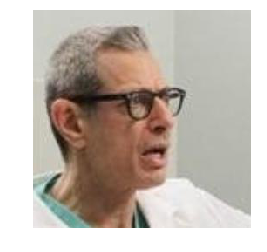

In [40]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
lena = mpimg.imread(preImg) # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [41]:
test_onePicture(preImg)

Model Loaded.
该图片预测为：0000156 文件夹下的明星，预测概率为：0.9990476965904236


In [35]:
test_onePicture(preImg)

Model Loaded.
该图片预测为：0000185 文件夹下的明星，预测概率为：0.6157042980194092
